In [1]:
pip install kaggle

     |████████████████████████████████| 58 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 4.6 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=d55ad445089a03c816c2d9671176154c9baa73de9cf2c07b99436552122e70f6
  Stored in directory: /Users/anmol_gorakshakar/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [136]:
downlaod_folder = '/Users/anmol_gorakshakar/python/machine_learning/'

In [137]:
import pandas as pd
dataset = pd.read_csv(f'{downlaod_folder}/heart.csv')

In [138]:
dataset.sample()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
73   51    1   0       140   261    0        0      186      1      0.0   

    slope  ca  thal  target  
73      2   0     2       1

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

In [6]:
X_train, X_test = train_test_split(dataset, 
                                   stratify=dataset.target, 
                                   random_state=121, 
                                   test_size = 0.2, 
                                   shuffle=True)

In [7]:
X_train.shape, X_test.shape

((242, 14), (61, 14))

In [12]:
X_test_array, X_test_label = X_test[[*X_test][:-1]].to_numpy(), X_test[[*X_test][-1]].to_numpy()
X_train_array, X_train_label = X_train[[*X_train][:-1]].to_numpy(), X_train[[*X_train][-1]].to_numpy()

In [33]:
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten
from keras import Sequential

In [23]:
X_test_array = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))
X_train_array = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))

In [85]:
import tensorflow as tf

In [102]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_array.shape[1:])))
model.add(LSTM(units=50, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=200, return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
cb=tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, verbose=1)
hst = model.fit(tf.cast(X_train_array,tf.float32), tf.cast(X_train.target, tf.int8), 
                 epochs=100,
                 batch_size=8, 
                 callbacks=cb, 
#                  shuffle=True, 
                 validation_split=0.1, 
                )

Epoch 1/100
28/28 [==============================] - 2s 16ms/step - loss: 0.6897 - accuracy: 0.5660 - val_loss: 0.6951 - val_accuracy: 0.4400
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5196 - val_loss: 0.6769 - val_accuracy: 0.5600
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6041 - val_loss: 0.6914 - val_accuracy: 0.5600
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.6112 - val_loss: 0.6719 - val_accuracy: 0.5600
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5295 - val_loss: 0.6820 - val_accuracy: 0.5600
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6085 - val_loss: 0.6801 - val_accuracy: 0.5600
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5908 - val_loss: 0.7162 - val_accuracy: 0.4400
Epoch 8/100


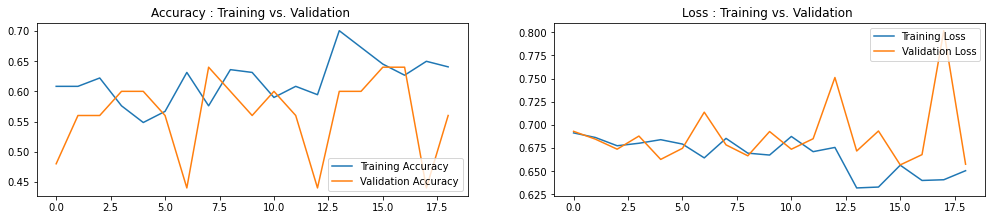

In [101]:
# round3
epochs = len(hst.epoch)
accuracy = hst.history['accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']
val_accuracy = hst.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

# Bad Example for using Neural Net

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [141]:
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [150]:
object_dict = {}
object_dict['sex'] = {1:'male', 0:'female'}
object_dict['chest_pain_type'] = {0:'no_pain',1:'typical_angina',2:'atypical_angina',
                                  3:'non_anginal_pain',4:'asymptomatic'}
object_dict['fasting_blood_sugar'] = {0:'< 120 mg/dl', 1:'> 120 mg/dl'}
object_dict['rest_ecg'] = {0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy',}
object_dict['exercise_induced_angina'] = {0:'no',1:'yes'}
object_dict['st_slope']={0:'upsloping',1:'flat',2:'downsloping'}
object_dict['thalassemia'] = {0:'normal',1:'normal',2:'fixed_defect',3:'reversable_defect',}

In [152]:
for col in dataset:
    if col in object_dict.keys():
        dataset[col] = [object_dict[col][i] for i in dataset[col]]

In [155]:
dataset = pd.get_dummies(dataset)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', 1), dataset['target'], test_size = .2, random_state=10)

In [158]:
X_train.sample(n=10)

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
130   54                     160          201                      163   
149   42                     130          180                      150   
256   58                     128          259                      130   
227   35                     120          198                      130   
140   51                     120          295                      157   
131   49                     134          271                      162   
8     52                     172          199                      162   
206   59                     110          239                      142   
167   62                     140          268                      160   
33    54                     125          273                      152   

     st_depression  num_major_vessels  sex_female  sex_male  \
130            0.0                  1           1         0   
149            0.0                  0           0         1   
256            3.0                  2           0         1   
227            1.6                  0           0         1   
140            0.6                  0           1         0   
131            0.0                  0           1         0   
8              0.5                  0           0         1   
206            1.2                  1           0         1   
167            3.6                  2           1         0   
33             0.5                  1           0         1   

     chest_pain_type_atypical_angina  chest_pain_type_no_pain  ...  \
130                                1                        0  ...   
149                                1                        0  ...   
256                                0                        1  ...   
227                                0                        1  ...   
140                                1                        0  ...   
131                                0                        0  ...   
8                                  1                        0  ...   
206                                0                        1  ...   
167                                0                        1  ...   
33                                 1                        0  ...   

     rest_ecg_left_ventricular_hypertrophy  rest_ecg_normal  \
130                                      0                0   
149                                      0                0   
256                                      0                1   
227                                      0                0   
140                                      0                1   
131                                      0                0   
8                                        0                0   
206                                      0                1   
167                                      0                1   
33                                       0                1   

     exercise_induced_angina_no  exercise_induced_angina_yes  \
130                           1                            0   
149                           1                            0   
256                           0                            1   
227                           0                            1   
140                           1                            0   
131                           1                            0   
8                             1                            0   
206                           0                            1   
167                           1                            0   
33                            1                            0   

     st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
130                     1              0                   0   
149                     1              0                   0   
256                     0              1                   0   
227                     0              1                   0   
140   

In [159]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [160]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [165]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [166]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [167]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix


array([[27,  8],
       [ 4, 22]])

In [168]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8709677419354839
Specificity :  0.7333333333333333


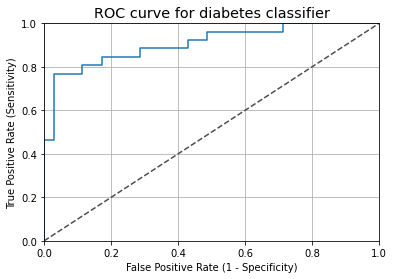

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [170]:
auc(fpr, tpr)

0.9065934065934066

In [171]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

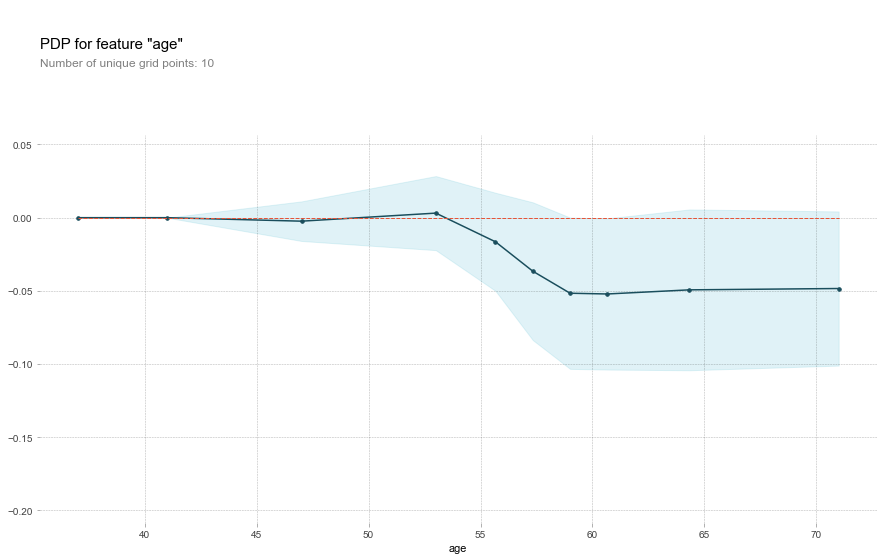

In [178]:
base_features = dataset.columns.values.tolist()
base_features.remove('target')

feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

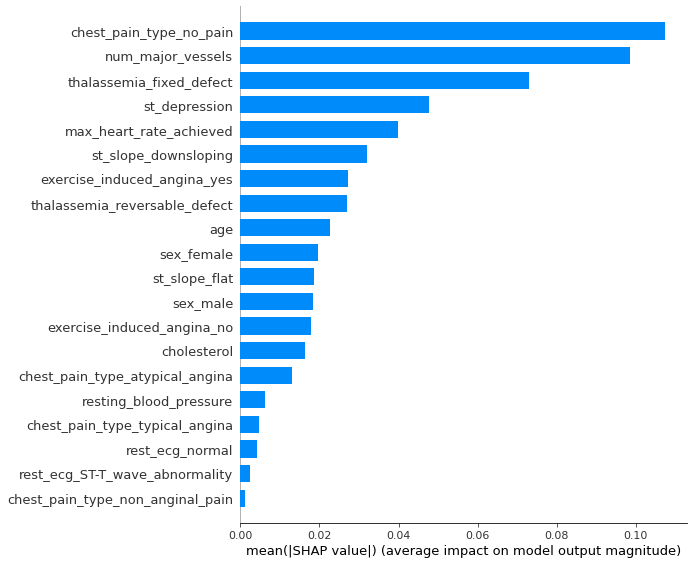

In [179]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

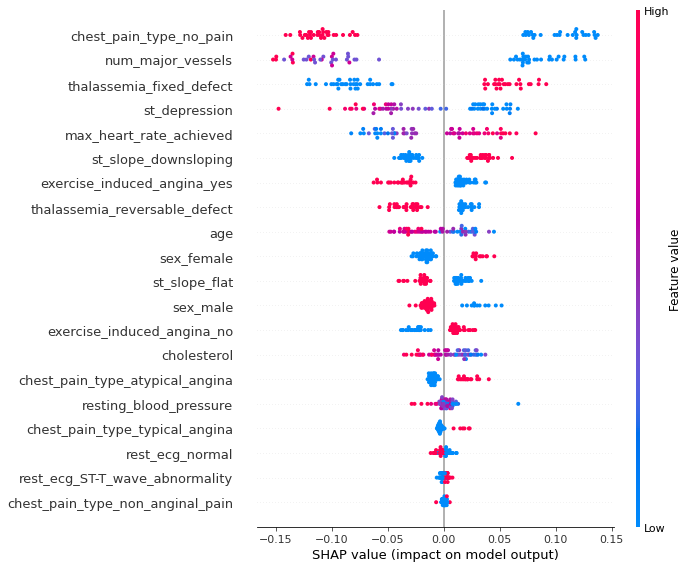

In [180]:
shap.summary_plot(shap_values[1], X_test)

In [181]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [182]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

In [1]:
...

Ellipsis